# Analysis of Tesla Stock Price in the most recnet 6 months

Author: [Chenxi Yang]

Course Project, UC Irvine, Math 10, S24

I would like to post my notebook on the course's website. [Yes]


The dataset I am analyzing is the 6-month data of Tesla stocks downloaded from NASDAQ website. I will be analyzing the dataset using relevant knowledge learned from Math 10.

**1 Importing and Cleaning Data**

In this step, I just imported some tools and imported the dataset to the notebook so that I can access it. I checked the basic information of the data, to make sure there is nothing wroing with it. It is important to mention, that since the data of Volume is too big, it is necessary to make sure the format matches that of the notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

data = pd.read_csv('tesla_stock.csv')
print(data)
pd.options.display.float_format = '{:.2f}'.format

           Date  Close/Last       Volume    Open    High     Low
0     6/12/2024      177.29   90389450.0  171.12  180.55  169.80
1     6/11/2024      170.66   64761930.0  173.92  174.75  167.41
2     6/10/2024      173.79   50869680.0  176.06  178.57  173.17
3      6/7/2024      177.48   56244930.0  176.13  179.35  175.58
4      6/6/2024      177.94   69887020.0  174.60  179.73  172.73
..          ...         ...          ...     ...     ...     ...
121  12/18/2023      252.08  116416500.0  253.78  258.74  251.36
122  12/15/2023      253.50  135932800.0  251.21  254.13  248.30
123  12/14/2023      251.05  160829200.0  241.22  253.88  240.79
124  12/13/2023      239.29  146286300.0  234.19  240.30  228.20
125  12/12/2023      237.01   95328310.0  238.55  238.99  233.87

[126 rows x 6 columns]


In [2]:
## Here, I checked for any possible missing values, since when saving, there could be data lost due to the format of the documents.
data['Date'] = pd.to_datetime(data['Date'])
print(data.isnull().sum())
print(data.describe())
print(data.info())

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64
                      Date  Close/Last       Volume   Open   High    Low
count                  126      126.00       126.00 126.00 126.00 126.00
mean   2024-03-13 09:20:00      191.54  98652550.56 191.70 195.12 188.08
min    2023-12-12 00:00:00      142.05  50869680.00 140.56 144.44 138.80
25%    2024-01-29 06:00:00      174.14  81622607.50 173.64 176.38 170.96
50%    2024-03-13 12:00:00      180.06  96402245.00 182.05 184.59 177.25
75%    2024-04-28 06:00:00      201.52 111163200.00 201.68 205.09 198.39
max    2024-06-12 00:00:00      261.44 243869700.00 263.66 265.13 257.52
std                    NaN       28.21  27664733.79  28.56  28.53  28.11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        126 non-null    d

**2 Most Basic Descriptions of the Dataset**

Here, I analyze the most basic concept to prepare for further analysis later on

In [3]:
## Here, I will analyze from the basic concept: the main descriptive information of the dataset
summary = data[['Close/Last', 'Volume', 'Open', 'High', 'Low']].describe()
# Display summary statistics
print("Summary Statistics:")
print(summary)
## Here, we have the most basic information about the stock price of Tesla from the most recent six months. However, it would not have any use for us 
## when analyzing price. I can still tell from the statistics that in the recent six months, the average price of Tesla is $191, ranging between the
## interval [142.05,261.44]

Summary Statistics:
       Close/Last       Volume   Open   High    Low
count      126.00       126.00 126.00 126.00 126.00
mean       191.54  98652550.56 191.70 195.12 188.08
std         28.21  27664733.79  28.56  28.53  28.11
min        142.05  50869680.00 140.56 144.44 138.80
25%        174.14  81622607.50 173.64 176.38 170.96
50%        180.06  96402245.00 182.05 184.59 177.25
75%        201.52 111163200.00 201.68 205.09 198.39
max        261.44 243869700.00 263.66 265.13 257.52


In [4]:
# Median for numeric columns
medians = data[['Close/Last', 'Volume', 'Open', 'High', 'Low']].median()

# Display medians
print("\nMedians:")
print(medians)

# Variance
variance = data[['Close/Last', 'Volume', 'Open', 'High', 'Low']].var()

# Standard deviation
std_dev = data[['Close/Last', 'Volume', 'Open', 'High', 'Low']].std()

# Display variance
print("\nVariance:")
print(variance)

# Display standard deviation
print("\nStandard Deviation:")
print(std_dev)


Medians:
Close/Last        180.06
Volume       96402245.00
Open              182.05
High              184.59
Low               177.25
dtype: float64

Variance:
Close/Last               795.98
Volume       765337495676689.88
Open                     815.68
High                     813.88
Low                      790.04
dtype: float64

Standard Deviation:
Close/Last         28.21
Volume       27664733.79
Open               28.56
High               28.53
Low                28.11
dtype: float64


**3 Linear Regression on Price and Volume**

I apply Linear Regression here to explore the relationship between the Price and the Volume of Tesla Stocks, since one of the commonly known pattern is that the Volume **confirms** price and then the price goes up further. I plan to prove this and see if it happens on Tesla as well. Therefore, I have the scatter plot of the Price and Volume of Tesla. One thing to mention here is that I intentionally put Price on the y-axis so that it will be easier to see, and I view Volume here as a independent variable, when Price is treated as the dependent variable.

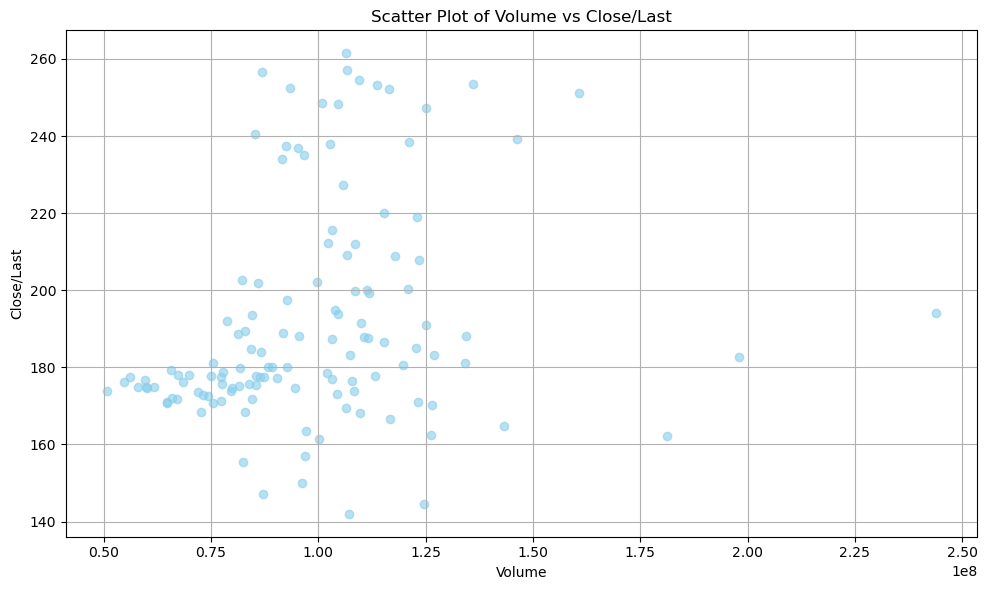

In [5]:
# Scatter plot of Volume vs Close/Last
plt.figure(figsize=(10, 6))
plt.scatter(data['Volume'], data['Close/Last'], color='skyblue', alpha=0.6)
plt.title('Scatter Plot of Volume vs Close/Last')
plt.xlabel('Volume')
plt.ylabel('Close/Last')
plt.grid(True)
plt.tight_layout()
plt.show()

**Linear Regression**

After the visualization, it is clear that they are linearly related. As the Volume goes up, most of the time the Price goes up as well. However, the slope is not influential or obvious enough for me to utilize this pattern.

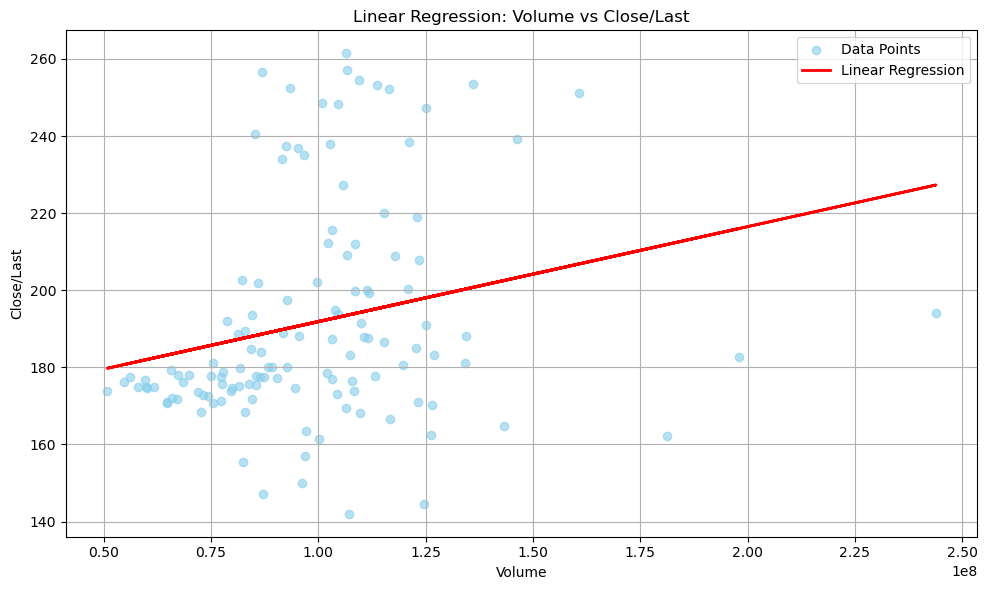

In [6]:
# Define X and y 
X = data['Volume']
y = data['Close/Last']

# Add a constant for the intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Visualizing the Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(data['Volume'], data['Close/Last'], color='skyblue', alpha=0.6, label='Data Points')
plt.plot(data['Volume'], results.predict(X), color='red', linewidth=2, label='Linear Regression')
plt.title('Linear Regression: Volume vs Close/Last')
plt.xlabel('Volume')
plt.ylabel('Close/Last')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**4 K-NN Classification on the Dataset**

In [7]:

# Create a new column 'Target' based on the change in 'Close/Last'
data['Target'] = (data['Close/Last'].shift(-1) >= data['Close/Last']).astype(int)

# Drop rows with NaN values (last row where there's no next day data)
data.dropna(inplace=True)

# Separate (X) and (y)
X = data[['Volume']]  # Features: Only using 'Volume' as an example
y = data['Target']     # Target: 'Target' column indicating price increase or decrease

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
k = 5  # Example value of K
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 4 16]
 [ 8 10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.20      0.25        20
           1       0.38      0.56      0.45        18

    accuracy                           0.37        38
   macro avg       0.36      0.38      0.35        38
weighted avg       0.36      0.37      0.35        38



It seems like the precision and accuracy of K-NN Classifier on Tesla dataset does not work very well. The percentage is low, and that it is useless to calculate hte Price using K-NN Classifier.

**5 Reference:**
The dataset is downloaded from https://www.nasdaq.com/market-activity/stocks/tsla/historical?page=13&rows_per_page=10&timeline=m6